## Comparing the weight names between C++ and Pytorch

In [3]:
import h5py
import torch
import torchvision.models as models

test = models.resnet18()

state_dict = test.state_dict()

In [25]:
# dumping the keys from the console output here for future comparison
cpp_dict_keys = """
bn1.bias
bn1.running_mean
bn1.running_var
bn1.weight
conv1.weight
fc.bias
fc.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.weight
layer1.0.conv1.weight
layer1.0.conv2.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.weight
layer1.1.conv1.weight
layer1.1.conv2.weight
layer2.0.bn1.bias
layer2.0.bn1.running_mean
layer2.0.bn1.running_var
layer2.0.bn1.weight
layer2.0.bn2.bias
layer2.0.bn2.running_mean
layer2.0.bn2.running_var
layer2.0.bn2.weight
layer2.0.conv1.weight
layer2.0.conv2.weight
layer2.0.downsample.0.weight
layer2.0.downsample.1.bias
layer2.0.downsample.1.running_mean
layer2.0.downsample.1.running_var
layer2.0.downsample.1.weight
layer2.1.bn1.bias
layer2.1.bn1.running_mean
layer2.1.bn1.running_var
layer2.1.bn1.weight
layer2.1.bn2.bias
layer2.1.bn2.running_mean
layer2.1.bn2.running_var
layer2.1.bn2.weight
layer2.1.conv1.weight
layer2.1.conv2.weight
layer3.0.bn1.bias
layer3.0.bn1.running_mean
layer3.0.bn1.running_var
layer3.0.bn1.weight
layer3.0.bn2.bias
layer3.0.bn2.running_mean
layer3.0.bn2.running_var
layer3.0.bn2.weight
layer3.0.conv1.weight
layer3.0.conv2.weight
layer3.0.downsample.0.weight
layer3.0.downsample.1.bias
layer3.0.downsample.1.running_mean
layer3.0.downsample.1.running_var
layer3.0.downsample.1.weight
layer3.1.bn1.bias
layer3.1.bn1.running_mean
layer3.1.bn1.running_var
layer3.1.bn1.weight
layer3.1.bn2.bias
layer3.1.bn2.running_mean
layer3.1.bn2.running_var
layer3.1.bn2.weight
layer3.1.conv1.weight
layer3.1.conv2.weight
layer4.0.bn1.bias
layer4.0.bn1.running_mean
layer4.0.bn1.running_var
layer4.0.bn1.weight
layer4.0.bn2.bias
layer4.0.bn2.running_mean
layer4.0.bn2.running_var
layer4.0.bn2.weight
layer4.0.conv1.weight
layer4.0.conv2.weight
layer4.0.downsample.0.weight
layer4.0.downsample.1.bias
layer4.0.downsample.1.running_mean
layer4.0.downsample.1.running_var
layer4.0.downsample.1.weight
layer4.1.bn1.bias
layer4.1.bn1.running_mean
layer4.1.bn1.running_var
layer4.1.bn1.weight
layer4.1.bn2.bias
layer4.1.bn2.running_mean
layer4.1.bn2.running_var
layer4.1.bn2.weight
layer4.1.conv1.weight
layer4.1.conv2.weight
"""

In [26]:
cpp_dict = sorted(filter(lambda x: x is not '', cpp_dict_keys.split('\n')))
pytorch_dict = sorted(state_dict.keys())

In [27]:
print(len(cpp_dict))
print(len(pytorch_dict))

102
102


In [28]:
cpp_dict == pytorch_dict

True

In [22]:
# In case they don't match -- use this
for weight_name in cpp_dict:
    
    if weight_name not in pytorch_dict:
        print(weight_name)

layer2.0.downsample.0.bias
layer3.0.downsample.0.bias
layer4.0.downsample.0.bias


## Saving all the weights to the HDF5 (classification model)

In [2]:
import h5py
import torch
import torchvision.models as models

test = models.resnet18(pretrained=True)

state_dict = test.state_dict()

h5f = h5py.File('resnet18.h5', 'w')

for key in state_dict:
    
    h5f.create_dataset(key, data=state_dict[key].numpy())

h5f.close()

## Comparing the outputs of two networks

In [1]:
import torch
import torchvision.models as models

net = models.resnet18(pretrained=True)
net = net.eval()

ones_input = torch.autograd.Variable( torch.ones(1, 3, 224, 224) )

pytorch_inference_result = net(ones_input).data.numpy().flatten()

In [2]:
import h5py
import torch
import torchvision.models as models


h5f = h5py.File('build/dump.h5', 'r')
pytorch_cpp_inference_result = h5f['main'][:]
h5f.close()

In [3]:
pytorch_cpp_inference_result

array([ -3.91369760e-02,   1.14462465e-01,  -1.79675698e+00,
        -1.23429608e+00,  -8.19002688e-01,   3.23956639e-01,
        -2.18659830e+00,  -1.28766203e+00,  -1.90191782e+00,
        -7.31478393e-01,   7.16431260e-01,  -1.66984892e+00,
        -1.45148838e+00,  -1.26586270e+00,  -1.57974708e+00,
        -1.03820741e+00,  -2.14776263e-01,  -2.07125401e+00,
        -1.55383050e+00,  -1.28312325e+00,  -5.83182573e-01,
         1.61934221e+00,  -3.04835849e-02,  -4.81382638e-01,
        -1.12977290e+00,  -3.69295120e-01,   3.88177842e-01,
         5.74406385e-02,   4.63158220e-01,  -2.70527869e-01,
        -1.43193495e+00,  -7.51389742e-01,  -4.15413052e-01,
        -1.85005021e+00,  -4.20624405e-01,  -1.19124305e+00,
        -5.19303024e-01,  -1.96238887e+00,   1.36617160e+00,
        -1.10589731e+00,  -7.77244210e-01,  -2.00785864e-02,
         1.33489385e-01,   1.31965864e+00,  -2.25081652e-01,
         6.34893000e-01,  -1.14253938e+00,   4.58114445e-01,
        -8.90816808e-01,

In [4]:
pytorch_inference_result

array([ -3.91345546e-02,   1.14463374e-01,  -1.79675746e+00,
        -1.23429585e+00,  -8.19004893e-01,   3.23958308e-01,
        -2.18660092e+00,  -1.28766274e+00,  -1.90191829e+00,
        -7.31479824e-01,   7.16434479e-01,  -1.66984880e+00,
        -1.45148873e+00,  -1.26586270e+00,  -1.57974839e+00,
        -1.03820848e+00,  -2.14777246e-01,  -2.07125592e+00,
        -1.55383122e+00,  -1.28312409e+00,  -5.83180845e-01,
         1.61934185e+00,  -3.04859243e-02,  -4.81385410e-01,
        -1.12977529e+00,  -3.69294673e-01,   3.88181329e-01,
         5.74417263e-02,   4.63160247e-01,  -2.70523697e-01,
        -1.43193471e+00,  -7.51389623e-01,  -4.15410608e-01,
        -1.85004878e+00,  -4.20623034e-01,  -1.19124162e+00,
        -5.19301355e-01,  -1.96238983e+00,   1.36617446e+00,
        -1.10589671e+00,  -7.77243376e-01,  -2.00760979e-02,
         1.33490682e-01,   1.31966197e+00,  -2.25080147e-01,
         6.34893954e-01,  -1.14254022e+00,   4.58116680e-01,
        -8.90815556e-01,

In [5]:
import numpy as np

# Equal up to 1e-4 by absolute value
np.allclose(pytorch_cpp_inference_result, pytorch_inference_result, atol=1e-4, rtol=0)

True

In [6]:
pwd

u'/home/mvp/platform/repos/pytorch-cpp'

## Saving all the weights to the HDF5 (segmentation model)

In [1]:
import sys
# update with your path
sys.path.insert(0, '../vision/')
sys.path.append("../dense-ai/")


import h5py
import torch
import torchvision.models as models

import dense_ai.models.resnet_dilated as resnet_dilated

fcn = resnet_dilated.Resnet18_8s(num_classes=21)
fcn.load_state_dict(torch.load('../resnet_18_8s_59.pth'))

state_dict = fcn.state_dict()

h5f = h5py.File('resnet18_fcn.h5', 'w')

for key in state_dict:
    
    # Manually removing the trailing 'resnet18_8s.'
    h5f.create_dataset(key[12:], data=state_dict[key].numpy())

h5f.close()

/home/mvp/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


## Comparing the segmentation models' outputs

In [1]:
import sys
# update with your path
sys.path.insert(0, '../vision/')
sys.path.append("../dense-ai/")

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import dense_ai.models.resnet_dilated as resnet_dilated

import numpy as np


ones_input = torch.autograd.Variable( torch.ones(1, 3, 224, 224) )

fcn = resnet_dilated.Resnet18_8s(num_classes=21)
fcn.load_state_dict(torch.load('../resnet_18_8s_59.pth'))
#fcn.cuda()
fcn.eval()

pytorch_inference_result = fcn(ones_input).data.numpy().flatten()


/home/mvp/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


In [2]:
pytorch_inference_result.shape

(16464,)

In [1]:
import h5py
import torch
import torchvision.models as models


h5f = h5py.File('build/resi.h5', 'r')
pytorch_cpp_inference_result = h5f['main'][:]
h5f.close()

In [2]:
pytorch_cpp_inference_result.shape

(1, 1, 68, 120)

In [3]:
import skimage.io as io
import numpy as np

io.imsh

In [5]:
import numpy as np

# Equal up to 1e-4 by absolute value
np.allclose(pytorch_cpp_inference_result, pytorch_inference_result, atol=1e-4, rtol=0)

True

In [5]:
pytorch_cpp_inference_result

array([ 4.720963  ,  4.41312599,  4.78989458, ..., -2.47858167,
       -2.05079269, -2.34748268], dtype=float32)

In [6]:
pytorch_inference_result

array([ 4.72096348,  4.41312599,  4.78989315, ..., -2.47858167,
       -2.0507946 , -2.34748459], dtype=float32)

## Save image into hdf5 to run a test on it in pytorch-cpp


In [1]:
import h5py
import skimage.io as io
import skimage

img = io.imread('../dense-ai/dense_ai/recipes/pascal_voc/segmentation/demo_img_vittal.jpg')
img = skimage.img_as_float(img)

h5f = h5py.File('img.h5', 'w')
# Manually removing the trailing 'resnet18_8s.'
h5f.create_dataset('main', data=img)
h5f.close()

In [5]:
img

array([[[ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.76862745,  0.79215686,  0.84705882],
        [ 0.76862745,  0.79215686,  0.84705882],
        [ 0.76862745,  0.79215686,  0.84705882],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       ..., 
       [[ 0.41176471,  0.41176471,  0.40392157],
        

In [14]:
import h5py
import numpy as np

h5f = h5py.File('build/resnet_from_cpp.h5', 'r')
pytorch_cpp_inference_result = h5f['conv1'][:]
h5f.close()

KeyError: "Unable to open object (Object 'conv1' doesn't exist)"

In [12]:
pytorch_cpp_inference_result

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ..

/home/mvp/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)


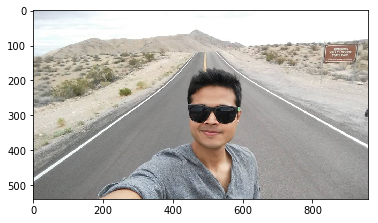

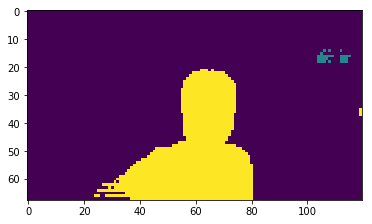

In [1]:
%matplotlib inline

import sys, os
sys.path.insert(0, '../vision/')
sys.path.append('../dense-ai/')

# Use second GPU -- change if you want to use a first one
# os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import dense_ai.models.resnet_dilated as resnet_dilated

import numpy as np


img_path = '../dense-ai/dense_ai/recipes/pascal_voc/segmentation/demo_img_vittal.jpg'

valid_transform = transforms.Compose(
                [
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB')

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

img = Variable(img.cuda())

fcn = resnet_dilated.Resnet18_8s(num_classes=21)
fcn.load_state_dict(torch.load('../resnet_18_8s_59.pth'))
fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()

In [2]:
segmentation.shape

(68, 120)

In [2]:
import h5py
import skimage.io as io
import skimage


h5f = h5py.File('vittal.h5', 'w')
# Manually removing the trailing 'resnet18_8s.'
h5f.create_dataset('main', data=img.cpu().data.numpy())
h5f.close()




In [7]:
img

array([[[ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        [ 0.76470588,  0.78823529,  0.84313725],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       [[ 0.76862745,  0.79215686,  0.84705882],
        [ 0.76862745,  0.79215686,  0.84705882],
        [ 0.76862745,  0.79215686,  0.84705882],
        ..., 
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ]],

       ..., 
       [[ 0.41176471,  0.41176471,  0.40392157],
        